In [ ]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt
import torch

In [ ]:
NUM_EPOCHS=300
LEARNING_RATE=0.01
MOMENTUM=0.91
BATCH_SIZE=128
# NUM_CLASSES=10

In [ ]:
labels=pd.read_csv('MNISTnumLabels5000_balanced.txt',names=["Labels"])
labels

,Labels
0,0
1,0
2,0
3,0
4,0
...,...
4995,9
4996,9
4997,9
4998,9


In [ ]:
images=pd.read_csv('MNISTnumImages5000_balanced.txt',sep='\t',header=None)
images

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [ ]:
images['Labels']=labels.values
images.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
4995,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9
4996,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9
4997,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9
4998,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9
4999,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9


In [ ]:
images_label_0=images[images['Labels']==0]
images_label_1=images[images['Labels']==1]
images_label_2=images[images['Labels']==2]
images_label_3=images[images['Labels']==3]
images_label_4=images[images['Labels']==4]
images_label_5=images[images['Labels']==5]
images_label_6=images[images['Labels']==6]
images_label_7=images[images['Labels']==7]
images_label_8=images[images['Labels']==8]
images_label_9=images[images['Labels']==9]

In [ ]:
train_dataset=pd.concat([images_label_0.iloc[:400,:],images_label_1.iloc[:400,:],images_label_2.iloc[:400,:],images_label_3.iloc[:400,:],images_label_4.iloc[:400,:]],axis=0)
train_dataset

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,4
2396,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,4
2397,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,4
2398,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,4


In [ ]:
#shuffling the dataset
train_dataset=train_dataset.iloc[np.random.permutation(len(train_dataset))]
train_dataset

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
1514,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,3
1637,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,3
280,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1701,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,3
1533,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,3
376,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2192,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,4
1305,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,2


In [ ]:
train_dataset=train_dataset.reset_index(drop=True)
train_dataset

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,3
1996,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,4
1998,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,2


In [ ]:
test_dataset=pd.concat([images_label_0.iloc[400:,:],images_label_1.iloc[400:,:],images_label_2.iloc[400:,:],images_label_3.iloc[400:,:],images_label_4.iloc[400:,:]],axis=0)
test_dataset=test_dataset.reset_index(drop=True)
test_dataset

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,4
496,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,4
497,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,4
498,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,4


In [ ]:
valid_dataset=pd.concat([images_label_5,images_label_6,images_label_7,images_label_8,images_label_9],axis=0)
valid_dataset=valid_dataset.reset_index(drop=True)
valid_dataset

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9
2496,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9
2497,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9
2498,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9


In [ ]:
hiddenlayersize = int(input("Enter number of hidden layers: "))
neurons = np.zeros((hiddenlayersize))
for i in range(0,hiddenlayersize):
    neurons[i] = int(input('Nuerons in hidden layer {}: '.format(i+1)))
print(neurons[i])    

Enter number of hidden layers: 1
Nuerons in hidden layer 1: 180
180.0


In [ ]:
# Creating and initializing weigts based on the neurons and hidden layers 

neurons = np.append([784],neurons)
neurons = np.append(neurons,[784])
neurons = neurons.astype(int)
# print(neurons)
w = []
for i in range(0,len(neurons)-1):
    temp = np.empty((neurons[i]+1,neurons[i+1]))
    for j in range(0,neurons[i]+1):
        for k in range(neurons[i+1]):
            temp[j,k] = random.uniform(-0.05,0.05)
    w.append(temp)
# print(w[0].shape)

In [ ]:
change_w = []
for i in range(0,len(neurons)-1):
    temp = np.empty((neurons[i]+1,neurons[i+1]))
    for j in range(0,neurons[i]+1):
        for k in range(neurons[i+1]):
            temp[j,k] = 0
    change_w.append(temp)
delta_t = change_w

In [ ]:

train_data=np.array(train_dataset)
test_data=np.array(test_dataset)
valid_data=np.array(valid_dataset)

In [ ]:
train_loss=[]
def compute_loss(data,w,Test):

  err = 0
  # train_data=np.array(train_dataset)

  temp_out = train_data[:,0:-1]
  y = train_data[:,0:-1]
  print(y.shape)
  for j in range(0,len(w)):
      one = np.ones((len(temp_out),1))
      # print(one.shape)
      temp_out = np.append(one,temp_out,axis=1)
      # print(temp_out)
      temp_out = np.matmul(temp_out,w[j])
      # print(temp_out.shape)
      temp_out = 1/(1+np.exp(-(temp_out)))

  err = np.multiply((y-temp_out),(y-temp_out))
  err = err.sum()
  if Test==False:
    return err/2000
  else:
    # print(23)
    return err/500


In [ ]:
# Initial loss for the train data and test data
print("Initial training loss", compute_loss(train_data,w,False))
print("Initial testing loss", compute_loss(test_data,w,True))
train_loss.append(compute_loss(train_data,w,False))
# test_loss.append(compute_loss(test_data,w,True))

(2000, 784)
Initial training loss 183.6599097824255
(2000, 784)
Initial testing loss 734.639639129702
(2000, 784)


In [ ]:
weights = w
# train_err_frac,test_err_frac=[],[]
for e in range(0,NUM_EPOCHS): 
    inp = train_data[0:500,:]
    err = 0
    for image in range(0,len(inp)):
        out = [inp[image,0:-1]]
        # dummy_t = np.zeros(10,)
        # real_t = int(inp[image,-1])
        # dummy_t[real_t] = 1
        real_t = inp[image,0:-1]
        temp_out = inp[image,0:-1]
        #feed forward
        for j in range(0,len(weights)):
            temp_out = np.hstack(([1],temp_out))
            w_layer = np.array(weights[j])
            temp_out = np.matmul(temp_out,w_layer)
            temp_out = 1/(1+np.exp(-(temp_out)))
            out.append(temp_out)
        
        y_pred = temp_out
        change_out = np.multiply((y_pred),(1-y_pred))
        error =np.array((real_t-y_pred))
        change_out=np.multiply(change_out,error)
        temp_change=change_out
        change_out=change_out.reshape((1,784))
        change_out=change_out.tolist()
        # for i in range (0,len(temp_out)):
        #     if temp_out[i] < 0.25:
        #         temp_out[i] = 0
        #     elif temp_out[i] > 0.75:
        #         temp_out[i] = 1
        #     else:
        #         pass
        # y_pred = temp_out
        # error = np.array((real_t-y_pred))
        # change_out = np.multiply(change_out,error)
        # temp_change = change_out
        # change_out = change_out.reshape((1,10))
        # change_out = change_out.tolist()
        for j in range(-1,-len(weights),-1):
            w_layer = weights[j]
            temp_change = np.matmul(w_layer[1:,:],temp_change)
            temp_change = np.multiply(temp_change,out[j-1])
            temp_change = np.multiply(temp_change,(1-out[j-1]))
            change_out.append(temp_change)
        change_out = change_out[::-1]
        delta = []
        for i in range(0,len(weights)):
            output_layer = out[i]
            output_layer = np.hstack(([1],output_layer))
            output_layer = np.reshape(output_layer,(len(output_layer),1))
            change_layer = np.reshape(change_out[i],(1,len(change_out[i])))
            delta_w = np.matmul(output_layer,change_layer)
            delta_w = np.multiply(LEARNING_RATE,delta_w)
            delta.append(delta_w)
        for g in range(0,len(weights)):
            if image == 0:
                delta_t[g] = delta[g]
            else:
                delta_t[g] = delta[g] + np.multiply(MOMENTUM,delta_t[g]) 
        for h in range(0,len(weights)):
            weights[h] = weights[h]+delta_t[h]
    print('Epoch: %03d/%03d Train loss: %.4f' % (e+1, NUM_EPOCHS, compute_loss(train_data,weights,False)))        
    # print("Running Epoch",e+1)
    if e%10==0:
      train_err=compute_loss(train_data,weights,False)
      # test_err=compute_loss(train_data,weights,False)
      # print(test_err)
      train_loss.append(train_err)
      # test_err_frac.append(test_err)

(2000, 784)
Epoch: 001/300 Train loss: 29.6153
(2000, 784)
(2000, 784)
Epoch: 002/300 Train loss: 21.7293
(2000, 784)
Epoch: 003/300 Train loss: 17.8493
(2000, 784)
Epoch: 004/300 Train loss: 15.4299
(2000, 784)
Epoch: 005/300 Train loss: 13.7051
(2000, 784)
Epoch: 006/300 Train loss: 12.4089
(2000, 784)
Epoch: 007/300 Train loss: 11.4068
(2000, 784)
Epoch: 008/300 Train loss: 10.6144
(2000, 784)
Epoch: 009/300 Train loss: 9.9734
(2000, 784)
Epoch: 010/300 Train loss: 9.4427
(2000, 784)
Epoch: 011/300 Train loss: 8.9977
(2000, 784)
(2000, 784)
Epoch: 012/300 Train loss: 8.6225
(2000, 784)
Epoch: 013/300 Train loss: 8.3049
(2000, 784)
Epoch: 014/300 Train loss: 8.0326
(2000, 784)
Epoch: 015/300 Train loss: 7.7962
(2000, 784)
Epoch: 016/300 Train loss: 7.5885
(2000, 784)
Epoch: 017/300 Train loss: 7.4035
(2000, 784)
Epoch: 018/300 Train loss: 7.2369
(2000, 784)
Epoch: 019/300 Train loss: 7.0865
(2000, 784)
Epoch: 020/300 Train loss: 6.9508
(2000, 784)
Epoch: 021/300 Train loss: 6.8289
(2

In [ ]:
len(train_loss)

31

In [ ]:
train_loss

[183.6599097824255,
 29.615254143807274,
 8.997673355621284,
 6.828916439218774,
 6.113685682601532,
 5.77724192247793,
 5.566595843069247,
 5.434869728384088,
 5.351778964441845,
 5.285198236259753,
 5.23605407498193,
 5.209955717641849,
 5.195881206203467,
 5.185660989418726,
 5.175731805658899,
 5.167009464690779,
 5.160423414452224,
 5.156843814429891,
 5.15561705116012,
 5.155059487435163,
 5.1556465705262084,
 5.157344837546773,
 5.158670489145579,
 5.159519175829561,
 5.160974088434175,
 5.162175830119349,
 5.16394782634976,
 5.166171856737581,
 5.169286533716733,
 5.173398682446655,
 5.177872663882479]

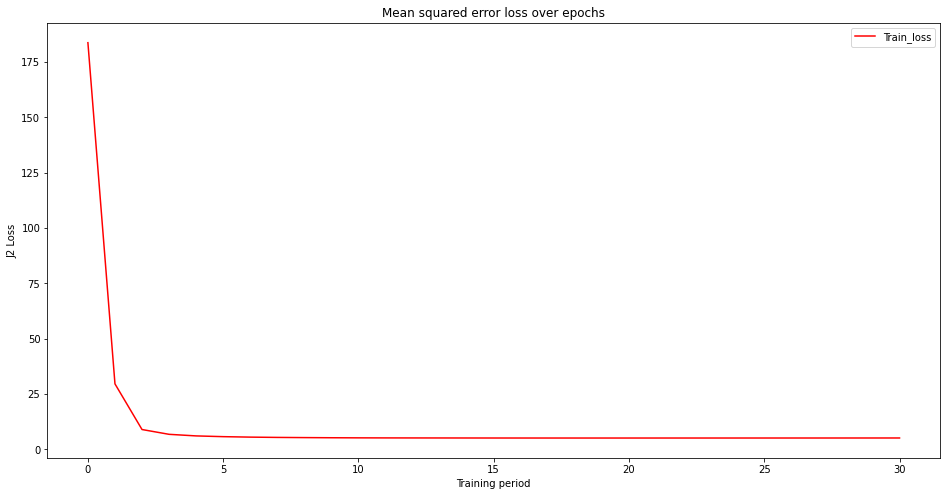

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(np.arange((NUM_EPOCHS/10)+1), train_loss,'r-',label="Train_loss")
# plt.xticks(np.arange(NUM_EPOCHS))
plt.xlabel("Training period")
plt.ylabel("J2 Loss")
plt.title("Mean squared error loss over epochs")
plt.legend()
plt.show()

In [ ]:
test_data[:,:-1].shape

(500, 784)

In [ ]:
input_o = test_data[:,:-1]
input_v=valid_data[:,:-1]
input_in = train_data[:,:-1]
y = train_data[:,0:-1]
y1 = test_data[:,:-1]
y2=valid_data[:,:-1]
for j in range(0,len(weights)):
    ones = np.ones((len(input_in),1))
    ones1 = np.ones((len(input_o),1))
    ones2=np.ones((len(input_v),1))
    input_in = np.append(ones,input_in,axis=1)
    input_o = np.append(ones1,input_o,axis=1)
    input_v = np.append(ones2,input_v,axis=1)
    input_in = np.matmul(input_in,weights[j])
    input_o = np.matmul(input_o,weights[j])
    input_v = np.matmul(input_v,weights[j])
    input_in = 1/(1+np.exp(-(input_in)))
    input_o = 1/(1+np.exp(-(input_o)))
    input_v = 1/(1+np.exp(-(input_v)))

In [ ]:
len(input_in)

2000

In [ ]:
len(input_v)

2500

In [ ]:
len(y1[0:])

500

For test set

In [ ]:
y_pred_five1 = input_o[0,:]
y_real_five1 = y1[0,:]
for i in range(1,5):
    k = i*100
    y_real_five1= np.vstack((y_real_five1,y1[k,:]))
    y_pred_five1 = np.vstack((y_pred_five1,input_o[k,:]))


In [ ]:
y_pred_five1.shape

(5, 784)

In [ ]:
input_v[0].shape

(784,)

For valid set 

In [ ]:
y_pred_five2 = input_v[0,:]
y_real_five2 = y2[0,:]
for i in range(1,5):
    k = i*500
    y_real_five2= np.vstack((y_real_five2,y2[k,:]))
    y_pred_five2 = np.vstack((y_pred_five2,input_v[k,:]))


In [ ]:
y_real_five2.shape

(5, 784)

In [ ]:
err = np.multiply((y-input_in),(y-input_in))
err1 = np.multiply((y1-input_o),(y1-input_o))
err2=np.multiply((y2-input_v),(y2-input_v))
train_error = err.sum()/2000
test_error = err1.sum()/500
valid_error=err2.sum()/2500

In [ ]:
valid_error

11.601898985320942

<Figure size 432x288 with 0 Axes>

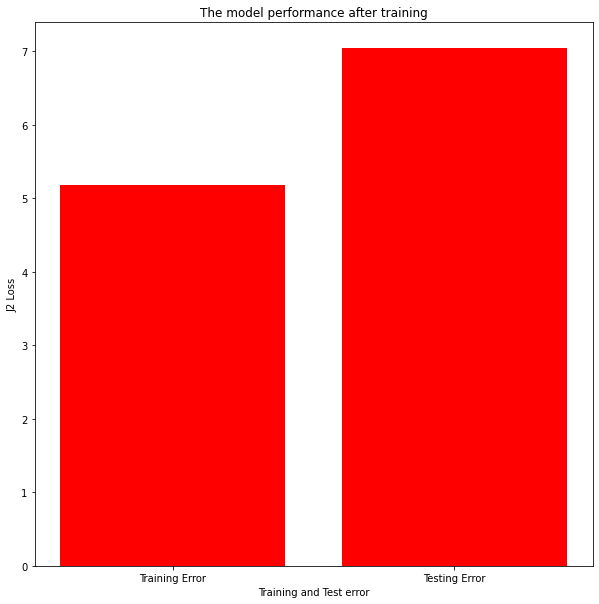

In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,10))
# ax = fig.add_axes([0,0,1,1])
label = ['Training Error','Testing Error']
output = [train_error,test_error]
plt.bar(label,output,color='r')
plt.xlabel("Training and Test error")
plt.ylabel("J2 Loss")
plt.title("The model performance after training")
plt.show()


#For test data (0-4)

In [ ]:
class_wise_train_error,class_wise_test_error=[],[]
for clas in range(0,5,1):
    i = clas*400
    j = clas*100
    error1 = err[i:i+400,:]
    error2 = err1[j:j+100,:]
    error1 = error1.sum()/400
    error2 = error2.sum()/100
    class_wise_train_error = np.append(class_wise_train_error,[error1],axis = 0).tolist()
    class_wise_test_error = np.append(class_wise_test_error,[error2],axis = 0).tolist()
basis = [class_wise_train_error,class_wise_test_error]

Text(0.5, 1.0, 'Class wise Comparision with train error and test error')

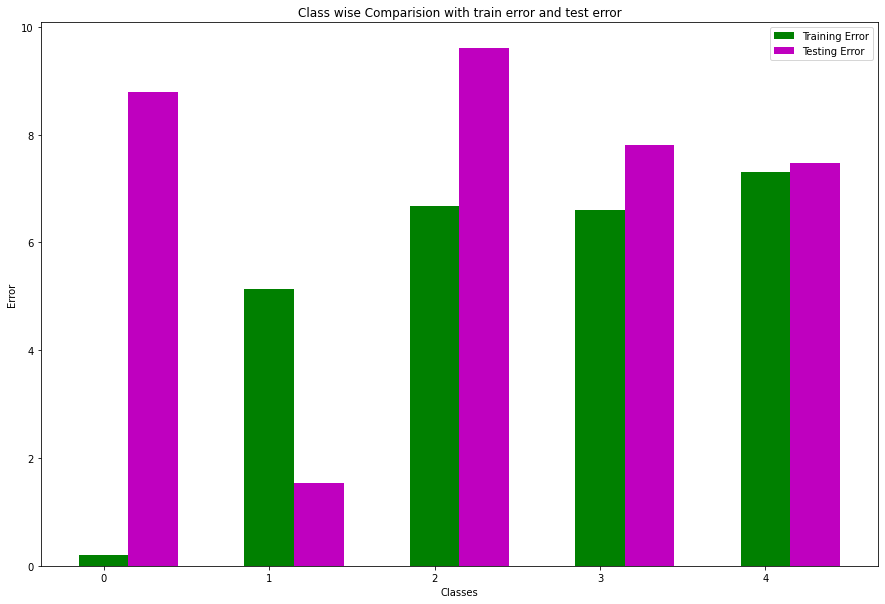

In [ ]:
plt.figure(figsize=(15,10))
br1 = np.arange(5)
br2 = [x + 0.3 for x in br1]

plt.bar(br1, class_wise_train_error, color ='g', width = 0.3,
         label ='Training Error')
plt.bar(br2, class_wise_test_error, color ='m', width = 0.3,
         label ='Testing Error')
plt.legend(loc="upper right")
plt.xticks(np.arange(5))         
plt.xlabel("Classes")
plt.ylabel("Error")
plt.title("Class wise Comparision with train error and test error")

#For valid data (5-9)

In [ ]:
class_wise_train_error,class_wise_valid_error=[],[]
for clas in range(0,5,1):
    i = clas*400
    j = clas*500
    error1 = err[i:i+400,:]
    error2 = err2[j:j+500,:]
    error1 = error1.sum()/400
    error2 = error2.sum()/500
    class_wise_train_error = np.append(class_wise_train_error,[error1],axis = 0).tolist()
    class_wise_valid_error = np.append(class_wise_valid_error,[error2],axis = 0).tolist()
basis = [class_wise_train_error,class_wise_valid_error]

Text(0.5, 1.0, 'valid data Loss values')

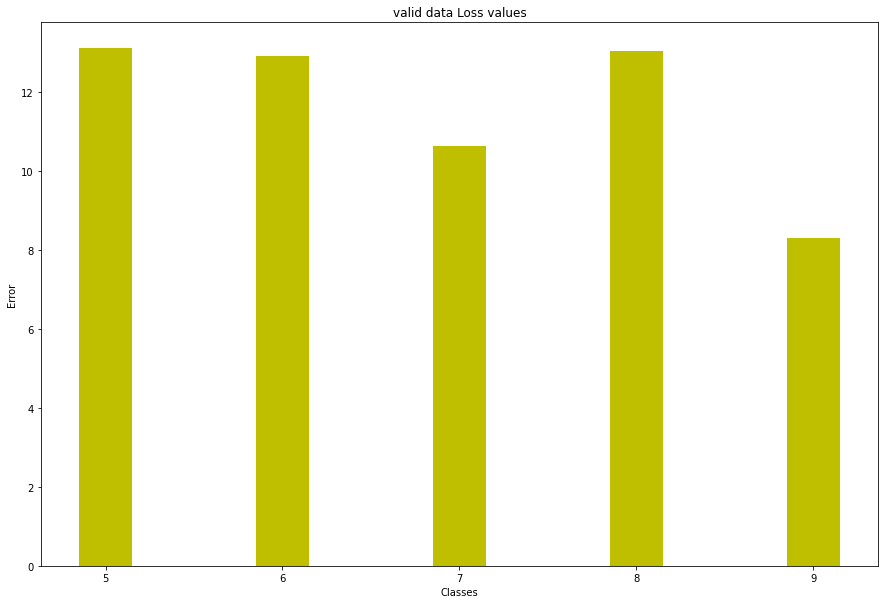

In [ ]:
plt.figure(figsize=(15,10))
br1=np.arange(5,10,1)
plt.bar(br1,class_wise_valid_error,color='y', width=0.3)
# plt.legend(loc="upper right")
plt.xticks(np.arange(5,10,1))         
plt.xlabel("Classes")
plt.ylabel("Error")
plt.title("valid data Loss values")

In [ ]:
label_0=train_dataset[train_dataset['Labels']==0]
label_0=label_0.sample(n=5,replace=False)
label_1=train_dataset[train_dataset['Labels']==0]
label_1=label_0.sample(n=5,replace=False)

In [ ]:
label_0

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
1197,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
129,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1477,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1226,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
966,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [ ]:
import seaborn as sns

In [ ]:
a=np.array(label_0.iloc[0,:-1]).reshape(28,28)

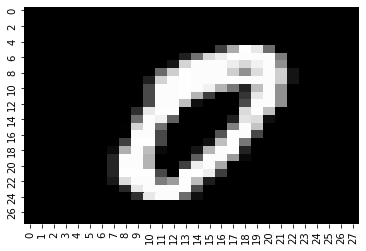

In [ ]:
sns.heatmap(a.T, cmap="gray", cbar=False)

In [ ]:
image_data=pd.DataFrame()

In [ ]:
for i in range(5):
  label=test_dataset[test_dataset['Labels']==i]
  label=label.sample(n=5,replace=False)
  image_data=pd.concat([image_data,label],axis=0)

In [ ]:
image_data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
25,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
74,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
192,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,1
144,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,1
111,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,1
145,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,1
185,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,1


In [ ]:
for i in range(5,10):
  label=valid_dataset[valid_dataset['Labels']==i]
  label=label.sample(n=5,replace=False)
  image_data=pd.concat([image_data,label],axis=0)

In [ ]:
image_data=image_data.reset_index(drop=True)
image_data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,1


In [ ]:
image_data=np.array(image_data)

In [ ]:
image_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 9.],
       [0., 0., 0., ..., 0., 0., 9.],
       [0., 0., 0., ..., 0., 0., 9.]])

In [ ]:
input_p = image_data[:,:-1]
y1 = image_data[:,:-1]
for j in range(0,len(weights)):
  ones = np.ones((len(input_p),1))
  input_p = np.append(ones,input_p,axis=1)
  input_p = np.matmul(input_p,weights[j])
  input_p = 1/(1+np.exp(-(input_p)))

In [ ]:
len(input_p)

50

In [ ]:
len(y1)

50

In [ ]:
a=np.array(input_p[49]).reshape(28,28)

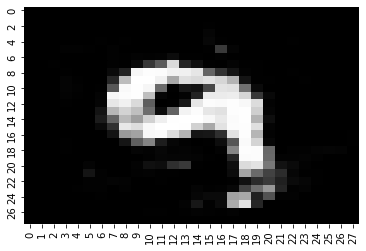

In [ ]:
sns.heatmap(a.T, cmap="gray", cbar=False)

In [ ]:
image_list_real=[]
for i in range(50):
  a=np.array(y1[i]).reshape(28,28)
  image_list_real.append(a)

In [ ]:
image_list_pred=[]
for i in range(50):
  a=np.array(input_p[i]).reshape(28,28)
  image_list_pred.append(a)

In [ ]:
image_list=[]
for i in range(10):
  for j in range(5):
    image_list.append(image_list_real[5*i+j])
  for k in range(5):
    image_list.append(image_list_pred[5*i+j])  

In [ ]:
len(image_list)

100

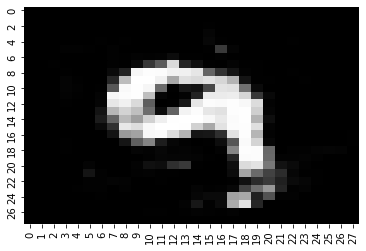

In [ ]:
a=np.array(image_list[98]).reshape(28,28)
sns.heatmap(a.T, cmap="gray", cbar=False)

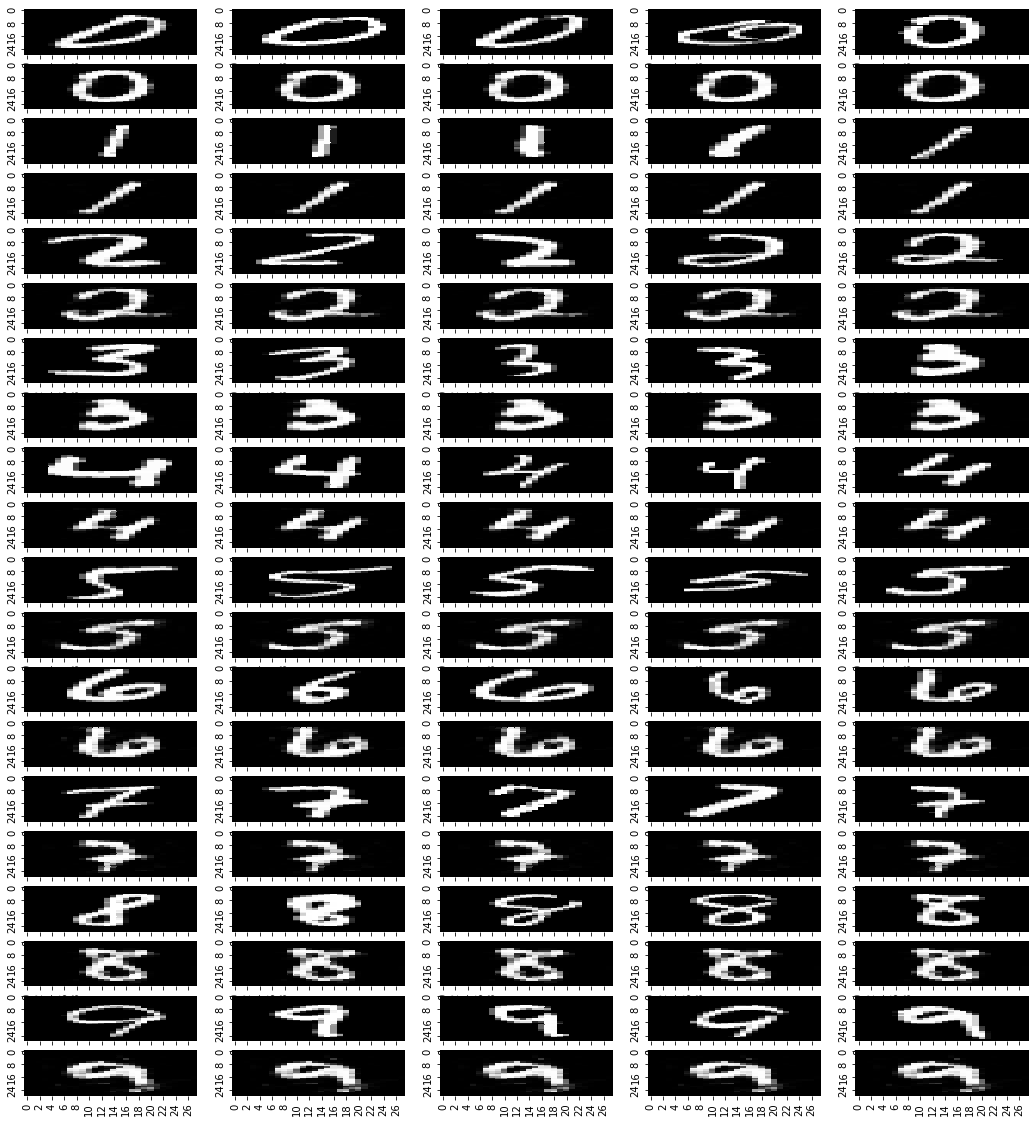

In [ ]:
plt.figure(figsize=(18,20))
for i in range(100):
  plt.subplot(20,5,i+1)
  sns.heatmap(pd.DataFrame(image_list[i].T), cmap="gray", cbar=False)
# plt.title("Original images(above) vs Predicted images(below)")  
plt.show()

5